<a href="https://colab.research.google.com/github/schatz06/EPL448_Project/blob/main/RatingsReviewsCategoriesEdition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Packages ## 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
import pandas.plotting as pdplt

##Read Data##

In [2]:
train_data = pd.read_excel('Data_Train.xlsx') # read training data
test_data  = pd.read_excel('Data_Test.xlsx') # read test data

Check for corrupted or empty records

In [3]:
print("Shape of train data",train_data.shape,"Problematic records in training data: ",train_data.isnull().sum().sum())
print("Shape of test data",test_data.shape,"Problematic records in test data: ",test_data.isnull().sum().sum())

Shape of train data (6237, 9) Problematic records in training data:  0
Shape of test data (1560, 8) Problematic records in test data:  0


##Train Data Preprocessing##

Peek of the data

In [4]:
train_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


Statistical summary

In [5]:
print(train_data.describe())

              Price
count   6237.000000
mean     560.707516
std      690.110657
min       25.000000
25%      249.180000
50%      373.000000
75%      599.000000
max    14100.000000


Price box plot

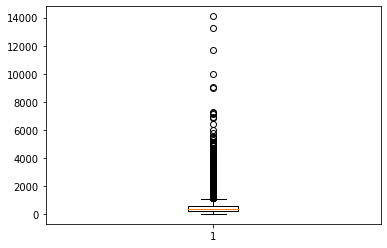

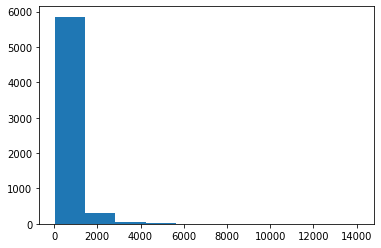

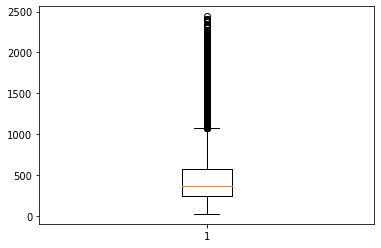

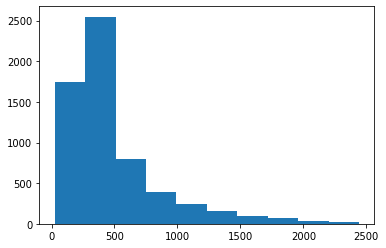

In [6]:
plt.boxplot(train_data['Price'])
plt.show()
plt.hist(train_data['Price'])
plt.show()
median = np.percentile(train_data.Price,50)  # median
std = train_data.Price.std() # standard deviation 
train_data = train_data.drop(train_data[ train_data.Price > (median+3*std)].index) # drop "outliers " that are > median + 3*std
plt.boxplot(train_data['Price'])
plt.show()
plt.hist(train_data['Price'])
plt.show()

In [7]:
train_data.describe()

,Price
count,6105.000000
mean,487.640822
std,384.816876
min,25.000000
25%,248.000000
50%,369.000000
75%,579.000000
max,2442.000000


Reviews Normalization

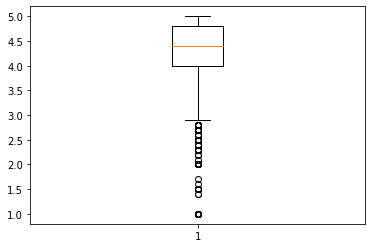

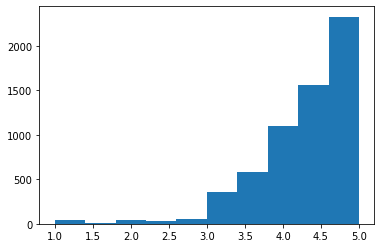

In [8]:
train_data['Reviews'] = train_data.Reviews.apply(lambda r: float(r.split()[0])) # get only the review rule 
plt.boxplot(train_data['Reviews'])
plt.show()
plt.hist(train_data['Reviews'])
plt.show()

Ratings Normalization

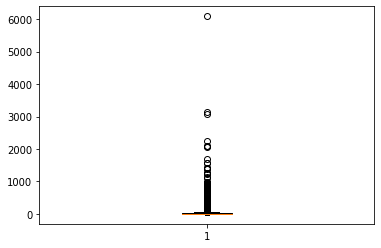

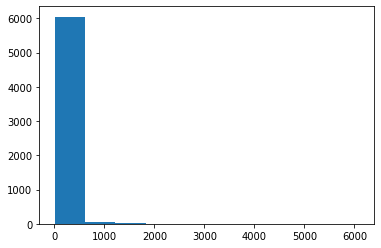

In [9]:
train_data['Ratings'] = train_data.Ratings.apply(lambda r: float(r.split()[0].replace(',',''))) # get only the rating 
plt.boxplot(train_data['Ratings'])
plt.show()
plt.hist(train_data['Ratings'])
plt.show()

Drop Title & Author & Synopsis & Genre columns

In [10]:
train_data.pop('Author')
train_data.pop('Title')
train_data.pop('Synopsis')
train_data.pop('Genre')

0         Action & Adventure (Books)
1         Cinema & Broadcast (Books)
2            International Relations
3       Contemporary Fiction (Books)
4              Photography Textbooks
                    ...             
6232            Anthropology (Books)
6233    Contemporary Fiction (Books)
6234                 Romance (Books)
6235      Action & Adventure (Books)
6236      Action & Adventure (Books)
Name: Genre, Length: 6105, dtype: object

Edition Normalization / Drop edition

In [11]:
train_data['Edition'] = train_data['Edition'].apply(lambda x: x.split(',')[0])

In [12]:
train_data.head()

,Edition,Reviews,Ratings,BookCategory,Price
0,Paperback,4.0,8.0,Action & Adventure,220.00
1,Paperback,3.9,14.0,"Biographies, Diaries & True Accounts",202.93
2,Paperback,4.8,6.0,Humour,299.00
3,Paperback,4.1,13.0,"Crime, Thriller & Mystery",180.00
4,Hardcover,5.0,1.0,"Arts, Film & Photography",965.62


Book Category Normalization / Extract Categories

In [13]:
train_data= pd.get_dummies(train_data, columns= ['BookCategory'],drop_first=True)

Finish training inputs(z)

In [14]:
train_data.head()

,Edition,Reviews,Ratings,Price,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,Paperback,4.0,8.0,220.00,0,0,0,0,0,0,0,0,0,0
1,Paperback,3.9,14.0,202.93,0,1,0,0,0,0,0,0,0,0
2,Paperback,4.8,6.0,299.00,0,0,0,0,0,1,0,0,0,0
3,Paperback,4.1,13.0,180.00,0,0,0,0,1,0,0,0,0,0
4,Hardcover,5.0,1.0,965.62,1,0,0,0,0,0,0,0,0,0


##Test Data Preprocessing##

Reviews Normalization

In [15]:
test_data['Reviews'] = test_data.Reviews.apply(lambda r: float(r.split()[0])) # get only the review rule 

Ratings Normalization

In [16]:
test_data['Ratings'] = test_data.Ratings.apply(lambda r: float(r.split()[0].replace(',',''))) # get only the rating 

Drop Title & Synopsis columns

In [17]:
test_data.pop('Title')
test_data.pop('Synopsis')
test_data.pop('Author')
test_data.pop('Genre')

0                            Short Stories (Books)
1                      Operating Systems Textbooks
2                                  Romance (Books)
3       Programming & Software Development (Books)
4                              Linguistics (Books)
                           ...                    
1555                                        Design
1556                  Children's Reference (Books)
1557                                Humour (Books)
1558                         United States History
1559                                  Dictionaries
Name: Genre, Length: 1560, dtype: object

Edition Normalization / Drop edition 

In [18]:
test_data['Edition'] = test_data['Edition'].apply(lambda x: x.split(',')[0])

In [19]:
test_data.head()

,Edition,Reviews,Ratings,BookCategory
0,Mass Market Paperback,4.4,960.0,"Crime, Thriller & Mystery"
1,Paperback,5.0,1.0,"Computing, Internet & Digital Media"
2,Paperback,5.0,4.0,Romance
3,Paperback,4.1,11.0,"Computing, Internet & Digital Media"
4,Paperback,4.4,9.0,"Language, Linguistics & Writing"


Book Category Normalization / Extract Categories

In [20]:
test_data= pd.get_dummies(test_data, columns= ['BookCategory'],drop_first=True)

Finish Test set Inputs

In [21]:
test_data.head()

,Edition,Reviews,Ratings,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,Mass Market Paperback,4.4,960.0,0,0,0,0,1,0,0,0,0,0
1,Paperback,5.0,1.0,0,0,0,1,0,0,0,0,0,0
2,Paperback,5.0,4.0,0,0,0,0,0,0,0,0,1,0
3,Paperback,4.1,11.0,0,0,0,1,0,0,0,0,0,0
4,Paperback,4.4,9.0,0,0,0,0,0,0,1,0,0,0


## Combine Train and Test datasets to extract categorical features ##

In [22]:
train = train_data.copy()
test = test_data.copy()
concat = pd.concat(objs=[train,test],axis=0)
y = train.pop('Price')

In [23]:
concat.head()

,Edition,Reviews,Ratings,Price,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,Paperback,4.0,8.0,220.00,0,0,0,0,0,0,0,0,0,0
1,Paperback,3.9,14.0,202.93,0,1,0,0,0,0,0,0,0,0
2,Paperback,4.8,6.0,299.00,0,0,0,0,0,1,0,0,0,0
3,Paperback,4.1,13.0,180.00,0,0,0,0,1,0,0,0,0,0
4,Hardcover,5.0,1.0,965.62,1,0,0,0,0,0,0,0,0,0


In [24]:
concat= pd.get_dummies(concat, columns= ['Edition'],drop_first=True)

In [25]:
concat.head()

,Reviews,Ratings,Price,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Edition_(French),Edition_(German),Edition_(Kannada),Edition_(Spanish),Edition_Board book,Edition_Cards,Edition_Flexibound,Edition_Hardcover,Edition_Leather Bound,Edition_Library Binding,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Perfect Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover
0,4.0,8.0,220.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,3.9,14.0,202.93,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,4.8,6.0,299.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4.1,13.0,180.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5.0,1.0,965.62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [26]:
train_size = len(train)
train = concat[:train_size]
test = concat[train_size:]

In [27]:
train.head()

,Reviews,Ratings,Price,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Edition_(French),Edition_(German),Edition_(Kannada),Edition_(Spanish),Edition_Board book,Edition_Cards,Edition_Flexibound,Edition_Hardcover,Edition_Leather Bound,Edition_Library Binding,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Perfect Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover
0,4.0,8.0,220.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,3.9,14.0,202.93,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,4.8,6.0,299.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4.1,13.0,180.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5.0,1.0,965.62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


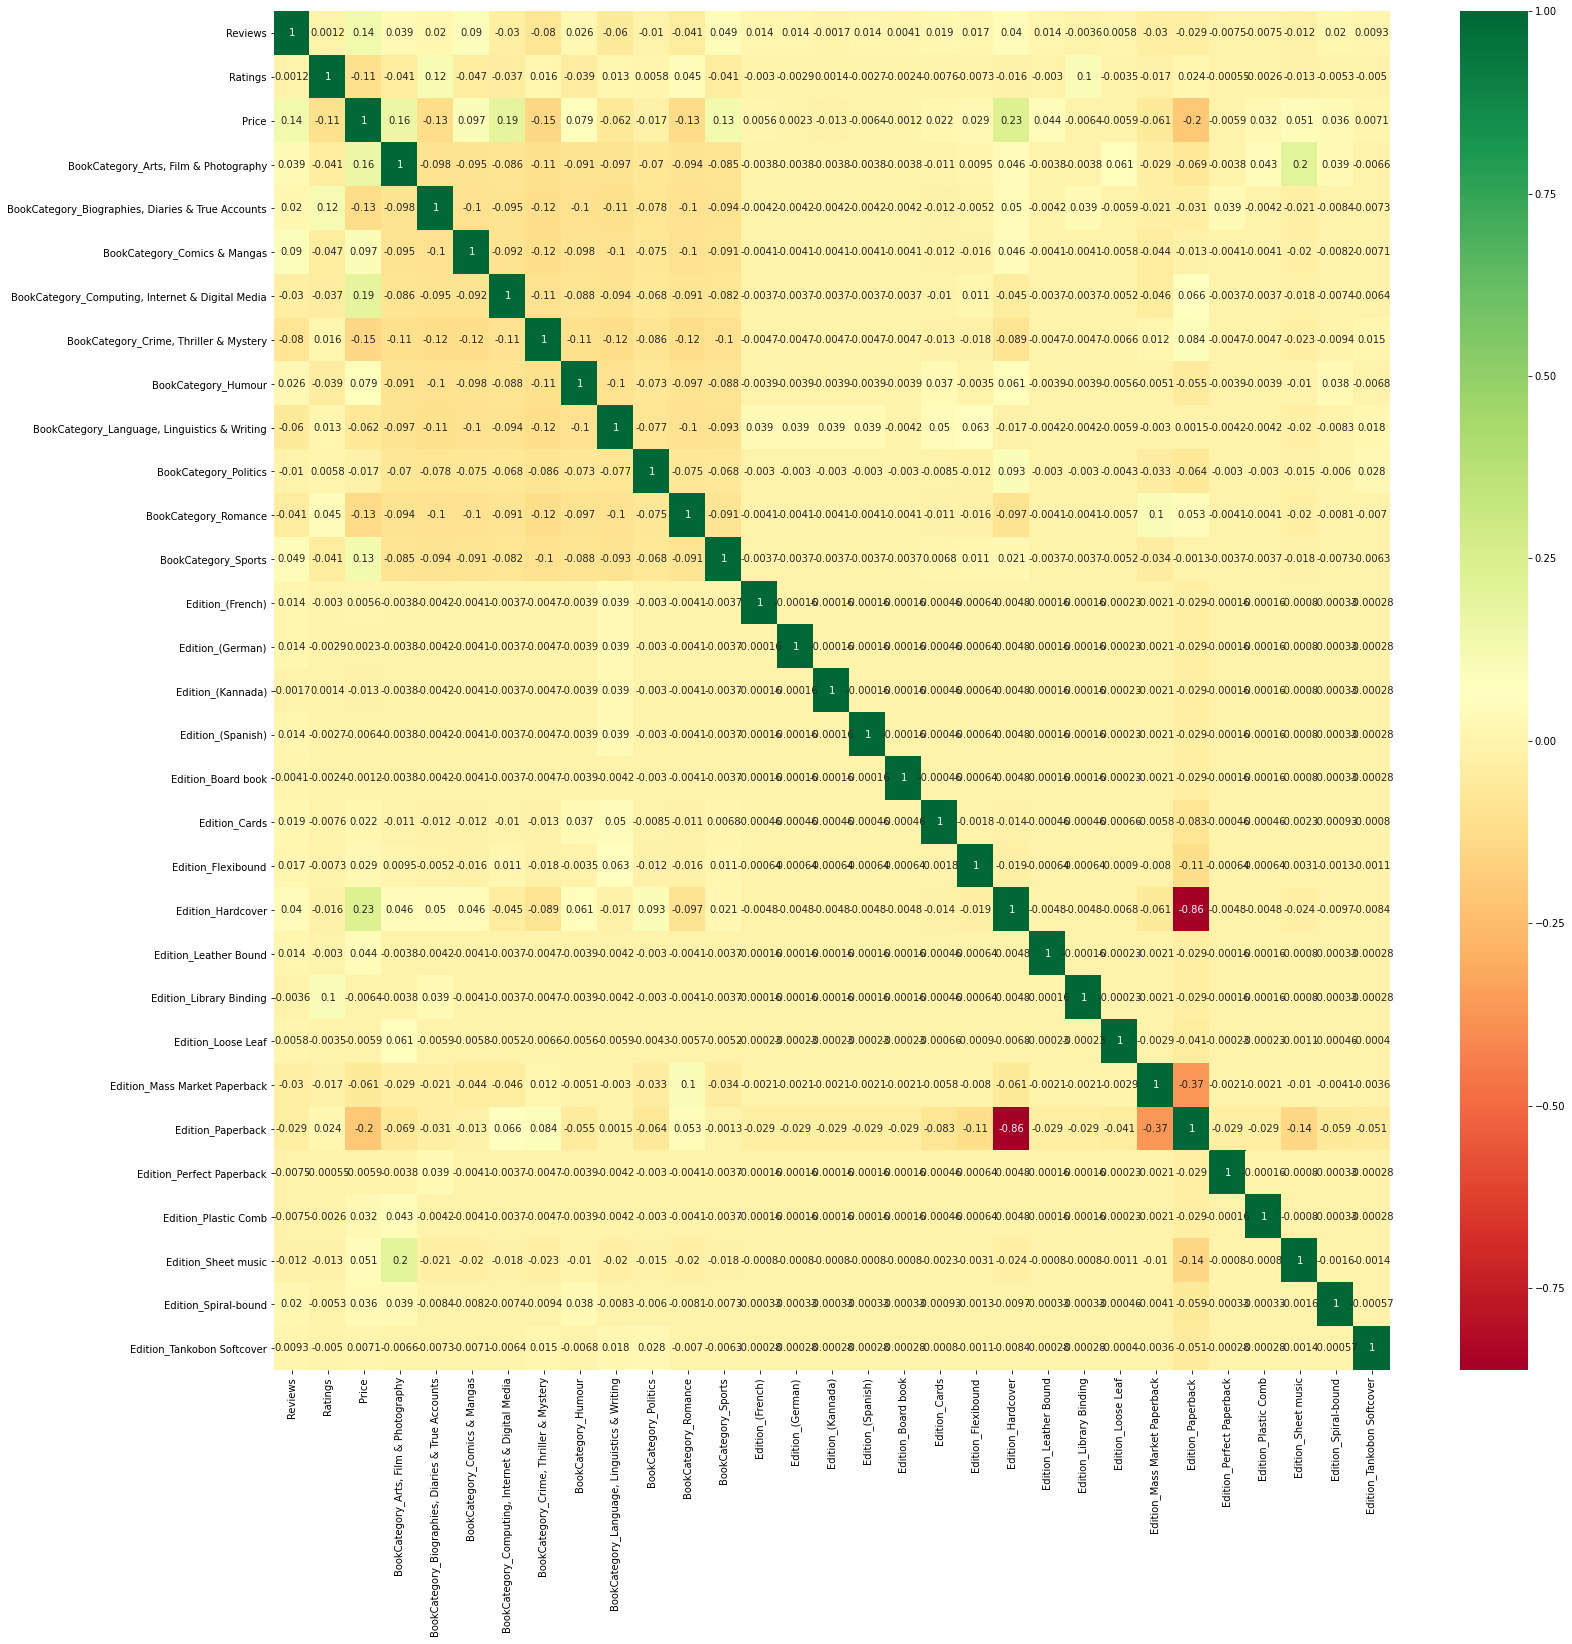

In [28]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(train.corr(), annot=True, cmap='RdYlGn')

In [29]:
y = train.pop('Price')
train.head()

,Reviews,Ratings,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Edition_(French),Edition_(German),Edition_(Kannada),Edition_(Spanish),Edition_Board book,Edition_Cards,Edition_Flexibound,Edition_Hardcover,Edition_Leather Bound,Edition_Library Binding,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Perfect Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover
0,4.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,3.9,14.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,4.8,6.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4.1,13.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [30]:
test.pop('Price')
test.head()

,Reviews,Ratings,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Edition_(French),Edition_(German),Edition_(Kannada),Edition_(Spanish),Edition_Board book,Edition_Cards,Edition_Flexibound,Edition_Hardcover,Edition_Leather Bound,Edition_Library Binding,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Perfect Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover
0,4.4,960.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5.0,4.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4.1,11.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4.4,9.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


##Prediction Methods##

Split train and test data


In [31]:
X = train.to_numpy()
y =y.to_numpy()

Import packages

In [32]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

Decision Tree Regressor



In [33]:
parameters = {'splitter': ['best','random'],
              'min_samples_leaf': [1,2],
              }
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_DT = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_DT.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_DT.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_DT.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_DT.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1884s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.5s finished


 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='random')

 The best score across ALL searched params:
 0.05149793863170833

 The best parameters across ALL searched params:
 {'min_samples_leaf': 2, 'splitter': 'random'}


In [34]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = DecisionTreeRegressor(**grid_DT.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df_dt = pd.DataFrame(predictions.astype(int))
df_dt.columns=['Price']
filepath_dt = 'Predictions_DecisionTrees.xlsx'
df_dt.to_excel(filepath_dt, index=False)
df_dt.head()

,Price
0,202
1,966
2,406
3,978
4,416


Gradient Boosting Regressor


In [35]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [100,500,1000,1500],
              'max_depth'    : [4,6,8,10]
              }
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_GBR = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_GBR.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  4

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.2, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.23130525461875617

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.2}


In [36]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = GradientBoostingRegressor(**grid_GBR.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df2 = pd.DataFrame(predictions.astype(int))
df2.columns=['Price']
df2['Price']= df2['Price']
filepath2 = 'PredictionsGradientBoosting.xlsx'
df2.to_excel(filepath2, index=False)
df2.head()



,Price
0,315
1,840
2,405
3,629
4,377


Random Forest regressor

In [37]:
parameters = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100,110,120,200]
}
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_RF = GridSearchCV(estimator=RandomForestRegressor(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_RF.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_RF.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_RF.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_RF.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=110, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.20726592878389835

 The best parameters across ALL searched params:
 {'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 200}


In [38]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = RandomForestRegressor(**grid_RF.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df3 = pd.DataFrame(predictions.astype(int))
df3.columns=['Price']
filepath3 = 'Predictions_RandomForest.xlsx'
df3.to_excel(filepath3, index=False)
df3.head()

,Price
0,406
1,737
2,453
3,719
4,416


KNeighbors Regressor

In [39]:
parameters = {
    'n_neighbors': [4, 5, 6, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_KNN = GridSearchCV(estimator=KNeighborsRegressor(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_KNN.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_KNN.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_KNN.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_KNN.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   23.6s


 Results from Grid Search 

 The best estimator across ALL searched params:
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

 The best score across ALL searched params:
 0.14100104217628534

 The best parameters across ALL searched params:
 {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   27.6s finished


In [40]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = KNeighborsRegressor(**grid_KNN.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df4 = pd.DataFrame(predictions.astype(int))
df4.columns=['Price']
filepath4 = 'Predictions_KNeighbors.xlsx'
df4.to_excel(filepath4, index=False)
df4.head()

,Price
0,334
1,952
2,408
3,1315
4,447


Elastic Net

In [41]:
parameters = {
    'alpha': [0,0.5,1],
    'l1_ratio': [0,0.5,1],
    'selection': ['cyclic', 'random']
}
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_EN = GridSearchCV(estimator=ElasticNet(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_EN.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_EN.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_EN.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_EN.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1756s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   10.7s finished


 Results from Grid Search 

 The best estimator across ALL searched params:
 ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='random', tol=0.0001, warm_start=False)

 The best score across ALL searched params:
 0.1997090556298997

 The best parameters across ALL searched params:
 {'alpha': 0.5, 'l1_ratio': 1, 'selection': 'random'}


In [42]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = ElasticNet(**grid_EN.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df5 = pd.DataFrame(predictions.astype(int))
df5.columns=['Price']
filepath5 = 'Predictions_ElasticNet.xlsx'
df5.to_excel(filepath5, index=False)
df5.head()

,Price
0,163
1,735
2,370
3,681
4,393


Lasso


In [45]:
parameters = {
    'alpha': [0,0.5,1],
    'selection': ['cyclic', 'random']
}
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_LASSO = GridSearchCV(estimator=Lasso(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_LASSO.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_LASSO.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_LASSO.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_LASSO.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    3.5s


 Results from Grid Search 

 The best estimator across ALL searched params:
 Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='random',
      tol=0.0001, warm_start=False)

 The best score across ALL searched params:
 0.20012026689512102

 The best parameters across ALL searched params:
 {'alpha': 1, 'selection': 'random'}


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.8s finished


In [46]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = Lasso(**grid_LASSO.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df6 = pd.DataFrame(predictions.astype(int))
df6.columns=['Price']
filepath6 = 'Predictions_Lasso.xlsx'
df6.to_excel(filepath6, index=False)
df6.head()

,Price
0,167
1,733
2,371
3,679
4,391
